In [1]:
import os
import sys
import inspect

# Insert modules directory, TODO create setup.py file
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
reports_dir = os.path.dirname(currentdir)
project_home_dir = os.path.dirname(reports_dir)
sys.path.insert(0, f"{project_home_dir}/qcnn")

In [2]:
import numpy as np
import pandas as pd
import os
import librosa
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display as ipd

from IPython.display import Image
from sklearn.metrics import confusion_matrix
from reporting_functions import (
    confusion_matrix_stats,
    plot_confusion_matrix_nn,
    get_tp_tn_lists,
    plot_loss,
    get_result_table,
    gather_experiment_results,
    gather_results_deprecated,
    get_file_content,
    get_result_table_target_pairs,
    get_multiclass_results,
)

from circuit_presets import (
    CIRCUIT_OPTIONS,
    POOLING_OPTIONS,
)
from preprocessing import filter_embedding_options, EMBEDDING_OPTIONS

# Use 3 decimal places in output display
pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [3]:
experiments_path = f"{project_home_dir}/experiments"
experiment_filename = "experiment_config.json"  # "experiment.txt"
experiment_time = "experiment_time.json"

In [4]:
experiment_id = 97
experiment_info = get_file_content(
    f"{experiments_path}/{experiment_id}/{experiment_filename}"
)
experiment_time_info = get_file_content(
    f"{experiments_path}/{experiment_id}/{experiment_time}"
)
result_data = gather_experiment_results(f"{experiments_path}/{experiment_id}")

/home/matt/dev/projects/quantum-cnn/qcnn/reporting_functions.py:26: RuntimeWarning: invalid value encountered in double_scalars
  f1_score = 2 * precision * recall / (precision + recall)


In [5]:
experiment_info

{'ID': 96,
 'path': '../experiments',
 'data': {'target_pairs': [['blues', 'blues'],
   ['classical', 'classical'],
   ['country', 'country'],
   ['disco', 'disco'],
   ['hiphop', 'hiphop'],
   ['jazz', 'jazz'],
   ['metal', 'metal'],
   ['pop', 'pop'],
   ['reggae', 'reggae'],
   ['rock', 'rock']]},
 'type': 'quantum',
 'preprocessing': {'reduction_method': 'pca',
  'scaler': {'Angle': [0, 1.5707963267948966], 'ZZMap': [-1, 1]},
  'kwargs': {'ZZMap': {'depth': 2}, 'IQP': {'depth': 2}},
  'embedding_list': ['Angle']},
 'model': {'circuit_list': ['U_5'], 'classification_type': 'ova'},
 'train': {'iterations': 1, 'test_size': 0.3, 'random_state': 40},
 'extra_info': 'debug, ova'}

In [6]:
experiment_time_info

{'pca-8-quantum-Angle-U_5-blues-blues': 16.053091526031494,
 'pca-8-quantum-Angle-U_5-classical-classical': 29.920085430145264,
 'pca-8-quantum-Angle-U_5-country-country': 43.35011339187622,
 'pca-8-quantum-Angle-U_5-disco-disco': 16.732666015625,
 'pca-8-quantum-Angle-U_5-hiphop-hiphop': 27.768853187561035,
 'pca-8-quantum-Angle-U_5-jazz-jazz': 38.65440392494202,
 'pca-8-quantum-Angle-U_5-metal-metal': 16.56433892250061,
 'pca-8-quantum-Angle-U_5-pop-pop': 29.922505617141724,
 'pca-8-quantum-Angle-U_5-reggae-reggae': 24.39253044128418,
 'pca-8-quantum-Angle-U_5-rock-rock': 17.313382863998413}

In [7]:
result_data.head()

,model,circuit,circuit_param_count,reduction_method,reduction_size,embedding_option,embedding_class,embedding_permutation,target_levels_list,target_levels,accuracy,precision,recall,f1,loss_train_history,loss_test_history,y_hat,y_test
0,pca-8-quantum-Angle-U_5-blues-blues,U_5,10.0,pca,8.0,Angle,Angle,1.0,"[blues, blues]",blues-blues,0.897,0.000,0.000,NaN,"0 21.247 Name: Train_Cost, dtype: float64","0 8.546 Name: Test_Cost, dtype: float64",0 1 1 1 2 0 3 1 4 1 ...,0 0 1 0 2 0 3 0 4 0 ...
1,pca-8-quantum-Angle-U_5-classical-classical,U_5,10.0,pca,8.0,Angle,Angle,1.0,"[classical, classical]",classical-classical,0.453,0.097,0.516,0.163,"0 16.575 Name: Train_Cost, dtype: float64","0 17.322 Name: Test_Cost, dtype: float64",0 0 1 0 2 0 3 0 4 0 ...,0 1 1 1 2 0 3 1 4 0 ...
2,pca-8-quantum-Angle-U_5-country-country,U_5,10.0,pca,8.0,Angle,Angle,1.0,"[country, country]",country-country,0.193,0.075,0.704,0.136,"0 16.844 Name: Train_Cost, dtype: float64","0 20.185 Name: Test_Cost, dtype: float64",0 0 1 0 2 0 3 0 4 0 ...,0 1 1 1 2 1 3 1 4 1 ...
3,pca-8-quantum-Angle-U_5-disco-disco,U_5,10.0,pca,8.0,Angle,Angle,1.0,"[disco, disco]",disco-disco,0.623,0.148,0.531,0.231,"0 14.904 Name: Train_Cost, dtype: float64","0 17.229 Name: Test_Cost, dtype: float64",0 0 1 0 2 0 3 0 4 0 ...,0 0 1 0 2 1 3 0 4 1 ...
4,pca-8-quantum-Angle-U_5-hiphop-hiphop,U_5,10.0,pca,8.0,Angle,Angle,1.0,"[hiphop, hiphop]",hiphop-hiphop,0.873,0.333,0.267,0.296,"0 16.906 Name: Train_Cost, dtype: float64","0 15.927 Name: Test_Cost, dtype: float64",0 0 1 0 2 0 3 0 4 0 ...,0 0 1 0 2 0 3 0 4 0 ...


In [8]:
result_data.shape

(10, 18)

/home/matt/dev/projects/quantum-cnn/python_env/qcnn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/matt/dev/projects/quantum-cnn/python_env/qcnn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/matt/dev/projects/quantum-cnn/python_env/qcnn/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

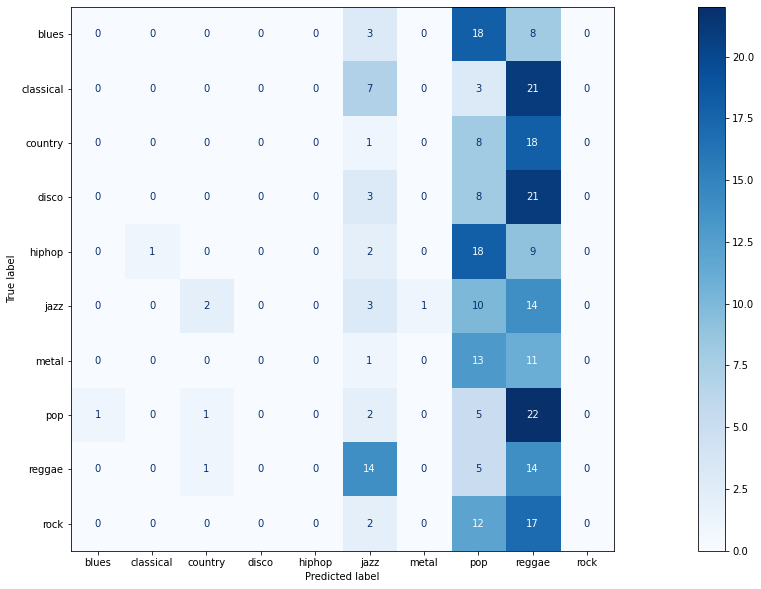

In [9]:
confusion_table, confusion_metrics = get_multiclass_results(
    experiments_path, experiment_info, "pca-8-quantum-Angle-U_5"
)

In [10]:
print(confusion_metrics)

              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        29
   classical       0.00      0.00      0.00        31
     country       0.00      0.00      0.00        27
       disco       0.00      0.00      0.00        32
      hiphop       0.00      0.00      0.00        30
        jazz       0.08      0.10      0.09        30
       metal       0.00      0.00      0.00        25
         pop       0.05      0.16      0.08        31
      reggae       0.09      0.41      0.15        34
        rock       0.00      0.00      0.00        31

    accuracy                           0.07       300
   macro avg       0.02      0.07      0.03       300
weighted avg       0.02      0.07      0.03       300



In [14]:
get_result_table_target_pairs(result_data, "circuit", "target_levels", "accuracy")

,reggae,disco,hiphop,country,blues,jazz,rock,metal,classical,pop,Average
reggae,0.293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.293
disco,NaN,0.623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.623
hiphop,NaN,NaN,0.873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.873
country,NaN,NaN,NaN,0.193,NaN,NaN,NaN,NaN,NaN,NaN,0.193
blues,NaN,NaN,NaN,NaN,0.897,NaN,NaN,NaN,NaN,NaN,0.897
jazz,NaN,NaN,NaN,NaN,NaN,0.163,NaN,NaN,NaN,NaN,0.163
rock,NaN,NaN,NaN,NaN,NaN,NaN,0.883,NaN,NaN,NaN,0.883
metal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.543,NaN,NaN,0.543
classical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.453,NaN,0.453
pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.35,0.350


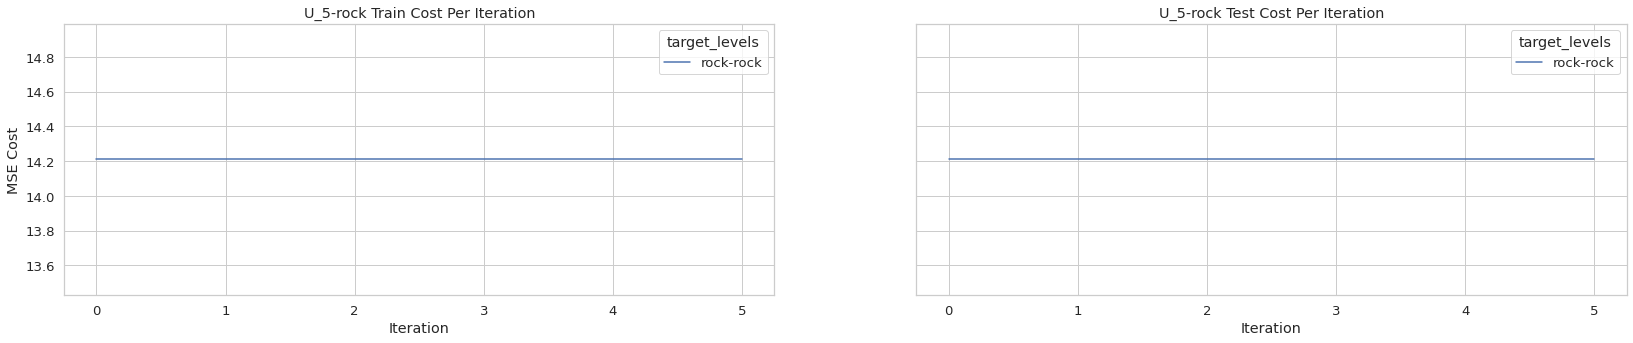

In [12]:
distinct_levels = list(
    {item for combo in experiment_info["data"]["target_pairs"] for item in combo}
)
for level in distinct_levels:
    plot_loss(result_data, "circuit", "target_levels", [f"{level}"], figsize=(28, 5))